In [5]:
import cma

es = cma.CMAEvolutionStrategy(8 * [0], 0.5)

es.optimize(cma.ff.rosen);
es.result_pretty();


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=466929, Sat Apr 21 22:44:08 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 5.245856238810283e+01 1.0e+00 4.19e-01  4e-01  4e-01 0:00.0
    2     20 2.434971737246111e+01 1.1e+00 3.46e-01  3e-01  3e-01 0:00.0
    3     30 2.892882594936827e+01 1.2e+00 3.35e-01  3e-01  3e-01 0:00.0
  100   1000 5.489058273454106e+00 5.7e+00 3.32e-02  8e-03  3e-02 0:00.1
  200   2000 1.754783913387039e+00 1.0e+01 8.68e-02  1e-02  4e-02 0:00.3
  300   3000 1.040294418527370e-01 2.3e+01 7.13e-02  3e-03  2e-02 0:00.4
  400   4000 1.151083612420823e-07 7.7e+01 4.95e-04  7e-06  2e-04 0:00.5
  488   4880 4.218242019474238e-14 6.4e+01 1.36e-06  5e-09  1e-07 0:00.7
termination on tolfun=1e-11
final/bestever f-value = 4.218242e-14 2.617696e-14
incumbent solution: [1.0000000026522906, 0.999999999992419, 1.0000000010536463, 1.000000008825832, 1.000000015885463, 1.000000023970211, 1.0000000500682253, 1.00000009853099]

In [8]:
len(es.ask())

10

In [54]:
es.best.get()

(array([1.        , 1.00000001, 1.        , 0.99999999, 0.99999999,
        0.99999999, 0.99999998, 0.99999996]), 3.687448312285955e-14, 4338)

In [11]:
es.tell()

TypeError: tell() missing 2 required positional arguments: 'solutions' and 'function_values'

In [55]:
cma.ff.rosen(es.best.get()[0])

3.687448312285955e-14

In [11]:
help(es.tell)

Help on method tell in module cma.evolution_strategy:

tell(solutions, function_values, check_points=None, copy=False) method of cma.evolution_strategy.CMAEvolutionStrategy instance
    pass objective function values to prepare for next
    iteration. This core procedure of the CMA-ES algorithm updates
    all state variables, in particular the two evolution paths, the
    distribution mean, the covariance matrix and a step-size.
    
    Arguments
    ---------
    `solutions`
        list or array of candidate solution points (of
        type `numpy.ndarray`), most presumably before
        delivered by method `ask()` or `ask_and_eval()`.
    `function_values`
        list or array of objective function values
        corresponding to the respective points. Beside for termination
        decisions, only the ranking of values in `function_values`
        is used.
    `check_points`
        If ``check_points is None``, only solutions that are not generated
        by `ask()` are possib

In [31]:
print(es.tell(es.ask(),list(range(10))))

None


In [32]:
es.logger.add()

In [33]:
es.disp()

In [34]:
es.result_pretty()

final/bestever f-value = 0.000000e+00 0.000000e+00
incumbent solution: [-1.2553518538734318, -2.1707432988609265, 0.24141570138562923, 0.8894886057740475, 0.1913645867151627, -0.8628535979475405, -0.19136718509674822, -0.434455289922554]
std deviation: [0.6021239394688946, 0.7612425939697748, 0.5743614661157478, 0.539043623489989, 0.5133889616642456, 0.5539505064729426, 0.5039389980253602, 0.5460227424027523]


CMAEvolutionStrategyResult(xbest=array([-0.05854607, -0.43709989,  0.20799779,  0.74176474,  0.49520995,
       -0.82833559,  0.48621811, -0.08546264]), fbest=0, evals_best=1, evaluations=70, iterations=7, xfavorite=array([-1.25535185, -2.1707433 ,  0.2414157 ,  0.88948861,  0.19136459,
       -0.8628536 , -0.19136719, -0.43445529]), stds=array([0.60212394, 0.76124259, 0.57436147, 0.53904362, 0.51338896,
       0.55395051, 0.503939  , 0.54602274]))

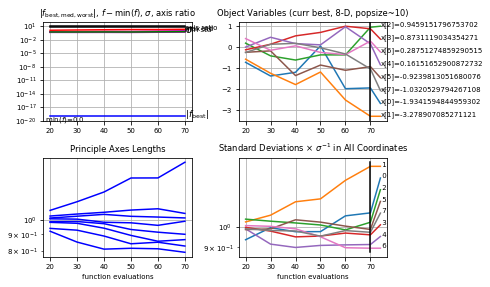

In [36]:
cma.plot()

In [62]:
import numpy as np
import gym
from core.agents import Linear, MLP, RNN

ENV_NAME = 'Pendulum-v0'
EPISODES = 10  # Number of times to run envionrment when evaluating
STEPS = 300  # Max number of steps to run run simulation

env = gym.make(ENV_NAME)

# Used to create controller
obs_dim = env.observation_space.shape[0]  # Input to controller (observ.)
action_dim = env.action_space.shape[0]  # Output from controller (action)
nodes = 10  # Unconnected nodes in network in the
# dt = 0.05  # dt for the environment, found in environment source code
dt = 1 # Works the best, 0.05 causes it to vanish

agent = MLP(obs_dim, action_dim,[3,3])

# ------------------------------------------------------------------------------
#                               SET UP GA PARAMETERS
# ------------------------------------------------------------------------------
POPULATION_SIZE = 40
NUM_GEN = 300   # Number of generations
DEME_SIZE = 3  # from either side

NUM_PARAMS = agent.num_params

def evaluate(individual, MAX_REWARD=0 ):
    """Lends heavily from evaluate.py"""
    # Load weights into RNN
    agent.set_weights(individual)


    total_reward = 0
    for episode in range(EPISODES):
        
        observation = env.reset()
        episode_reward = 0
        
        for step in range(STEPS):
            observation = observation / np.array([1,1,8])
            action = agent.percieve(observation) * 2
            observation, reward, done, _ = env.step(action)
            episode_reward += reward

            if done:
                break
        total_reward += episode_reward

    # returns the average reward for number of episodes run
    total_reward /= EPISODES
    
    return total_reward

[2018-04-21 15:37:54,510] Making new env: Pendulum-v0


In [64]:
es = cma.CMAEvolutionStrategy(agent.num_params * [0], 1)

es.optimize(evaluate);

(6_w,13)-aCMA-ES (mu_w=4.0,w_1=38%) in dimension 28 (seed=367270, Sat Apr 21 15:43:28 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     13 -1.545001264992183e+03 1.0e+00 9.27e-01  9e-01  9e-01 0:00.4
    2     26 -1.512739636295502e+03 1.1e+00 8.90e-01  9e-01  9e-01 0:00.9
    3     39 -1.515829901700438e+03 1.1e+00 8.68e-01  9e-01  9e-01 0:01.3
   11    143 -1.560011884585652e+03 1.3e+00 9.60e-01  9e-01  1e+00 0:04.5
   22    286 -1.495006063444329e+03 1.7e+00 1.19e+00  1e+00  1e+00 0:08.8
   35    455 -1.518441090720577e+03 1.7e+00 1.22e+00  1e+00  1e+00 0:14.2
   50    650 -1.598206376916473e+03 1.8e+00 1.13e+00  1e+00  1e+00 0:20.3
   68    884 -1.527056759721780e+03 2.0e+00 1.17e+00  1e+00  1e+00 0:27.5
   88   1144 -1.522238791119368e+03 2.2e+00 1.07e+00  1e+00  1e+00 0:35.6
  100   1300 -1.513569918996237e+03 2.3e+00 1.20e+00  1e+00  1e+00 0:40.3
  125   1625 -1.585826464020031e+03 2.5e+00 9.83e-01  9e-01  1e+00 0:50.4
  153   1989 -1.456204

In [72]:
evaluate(es.best.get()[0])

-1276.297104936177

In [1]:
import numpy as np
import gym
from core.agents import rnn

ENV_NAME = 'Pendulum-v0'
EPISODES = 3  # Number of times to run envionrment when evaluating
STEPS = 300  # Max number of steps to run run simulation

env = gym.make(ENV_NAME)

# Used to create controller
obs_dim = env.observation_space.shape[0]  # Input to controller (observ.)
action_dim = env.action_space.shape[0]  # Output from controller (action)
nodes = 10  # Unconnected nodes in network in the
# dt = 0.05  # dt for the environment, found in environment source code
dt = 1 # Works the best, 0.05 causes it to vanish


[2018-04-21 20:52:39,749] Making new env: Pendulum-v0


In [2]:
agent = rnn(obs_dim, action_dim, 10)

# ------------------------------------------------------------------------------
#                               SET UP GA PARAMETERS
# ------------------------------------------------------------------------------
POPULATION_SIZE = 40
NUM_GEN = 300   # Number of generations
DEME_SIZE = 3  # from either side

NUM_PARAMS = agent.num_params
print(NUM_PARAMS)

def evaluate(individual, MAX_REWARD=0 ):
    """Lends heavily from evaluate.py"""
    # Load weights into RNN
    agent.set_weights(individual)


    total_reward = 0
    for episode in range(EPISODES):
        
        observation = env.reset()
        episode_reward = 0
        
        for step in range(STEPS):
            observation = observation / np.array([1,1,8])
            action = agent.percieve(observation) * 2
            observation, reward, done, _ = env.step(action)
            episode_reward += reward

            if done:
                break
        total_reward += episode_reward

    # returns the average reward for number of episodes run
    total_reward /= EPISODES
    
    return total_reward

151


In [3]:
import cma

In [4]:
es = cma.CMAEvolutionStrategy(agent.num_params * [0], 1)

es.optimize(evaluate);

(9_w,19)-aCMA-ES (mu_w=5.6,w_1=29%) in dimension 151 (seed=484049, Sat Apr 21 20:52:40 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     19 -1.490180143139148e+03 1.0e+00 9.70e-01  1e+00  1e+00 0:00.5
    2     38 -1.543116402671411e+03 1.0e+00 9.44e-01  9e-01  9e-01 0:01.0
    3     57 -1.570067970030574e+03 1.0e+00 9.23e-01  9e-01  9e-01 0:01.6
    9    171 -1.463907726773008e+03 1.0e+00 8.41e-01  8e-01  8e-01 0:04.8
   18    342 -1.626527033012399e+03 1.0e+00 7.81e-01  8e-01  8e-01 0:09.2
   28    532 -1.512635289283581e+03 1.1e+00 7.61e-01  8e-01  8e-01 0:14.4
   40    760 -1.612133056903772e+03 1.1e+00 7.40e-01  7e-01  7e-01 0:20.5
   54   1026 -1.627987640152108e+03 1.2e+00 7.18e-01  7e-01  7e-01 0:27.6
   70   1330 -1.460422407051435e+03 1.2e+00 7.28e-01  7e-01  7e-01 0:35.7
   89   1691 -1.603130400330567e+03 1.3e+00 6.96e-01  7e-01  7e-01 0:45.1
  100   1900 -1.745042801939242e+03 1.3e+00 6.93e-01  7e-01  7e-01 0:51.0
  122   2318 -1.74207

In [ ]:
evaluate(es.best.get()[0])